Packages

In [1]:
from os import listdir
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import tensorflow as tf

Data preparation

In [2]:
# Look at data folder structure
classes_dir = listdir("data/Kather_texture_2016_image_tiles_5000")
classes_dir

['.DS_Store',
 '01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

In [3]:
# Check files
files = listdir("data/Kather_texture_2016_image_tiles_5000/01_TUMOR")
for n in range(5):
    print(files[n])

10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif
10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif
100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif
10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif
10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif


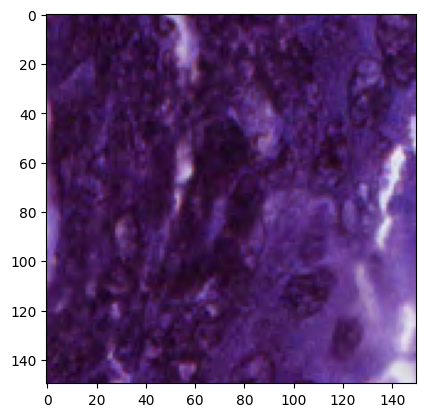

In [4]:
# visualize example image
file = cv2.imread("data/Kather_texture_2016_image_tiles_5000/01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif")
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
# file = cv2.resize(file, (128, 128))
plt.imshow(file)

In [69]:
# Load data
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data/Kather_texture_2016_image_tiles_5000"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = int(imagePath.split(os.path.sep)[-2][1])
    # Since we are going to use MobileNetV2 we need to resize the images
    # to the expected size by the pre-trained network.
    image = load_img(imagePath, target_size=(150, 150))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = tf.cast(image, tf.float32) / 255.0 #normalize
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In [70]:
data[0].shape

(150, 150, 3)

In [71]:
print(labels[10], labels[2500], labels[4500])

1 5 8


In [35]:
data[0]

array([[[-0.0013687 , -0.00306036, -0.00130719],
        [-0.00081507, -0.00287582, -0.00127643],
        [-0.00081507, -0.00287582, -0.00127643],
        ...,
        [-0.00149173, -0.00321415, -0.00183007],
        [-0.00164552, -0.00336794, -0.00198385],
        [-0.00204537, -0.00333718, -0.00210688]],

       [[-0.00164552, -0.00299885, -0.00149173],
        [-0.00112265, -0.00290657, -0.00139946],
        [-0.00118416, -0.00296809, -0.00146098],
        ...,
        [-0.00096886, -0.00287582, -0.00143022],
        [-0.00139946, -0.00330642, -0.00186082],
        [-0.00213764, -0.00342945, -0.00219915]],

       [[-0.00176855, -0.00284506, -0.00161476],
        [-0.00164552, -0.00293733, -0.00170704],
        [-0.00176855, -0.00306036, -0.00183007],
        ...,
        [-0.00038447, -0.00247597, -0.00096886],
        [-0.0009381 , -0.0030296 , -0.00152249],
        [-0.00192234, -0.00330642, -0.00204537]],

       ...,

       [[-0.00186082, -0.00327566, -0.00213764],
        [-0

In [27]:
# perform one-hot encoding on the labels
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)
# print(labels[0][0], type(labels[0]))

In [36]:
print(type(labels[0]))

<class 'numpy.float64'>


In [37]:
# index list
index = [x for x in range(0, len(labels))]
print(len(index), index[-1])

5000 4999


In [147]:
# Split of data into train and test
# (trainX, testX, trainY, testY, train_index, test_index) = train_test_split(data, labels, index, test_size=0.20, stratify=labels, random_state=42)

In [72]:
# Split into train, val, test set
x, x_test, y, y_test = train_test_split(data, labels, test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25,train_size =0.75)

Checking if shuffeled correctly

In [224]:
# plt.imshow(trainX[1983])

In [225]:
# print(trainY[1983], "\n", train_index[1983])

In [226]:
# plt.imshow(data[3746])

In [227]:
# print(labels[3746],"\n", labels[3746] == trainY[1983])

In [228]:
# plt.imshow(testX[800])

In [229]:
# print(testY[800], "\n", test_index[800])

In [230]:
# plt.imshow(data[4823])

In [231]:
# print(labels[4832],"\n", labels[4832] == trainY[800])

In [234]:
# trainY[0]

In [ ]:
# trainX_df = pd.DataFrame(trainX)
# trainY_df = pd.DataFrame(trainY)
# # testX_series = pd.Series(testX)
# # testY_series = pd.Series(testY)
# print(trainY_df.head())

In [ ]:
# # Saving datasets
# training_set = pd.concat([pd.Series(trainX), pd.Series(trainY), pd.Series(train_index)], axis=1)
# test_set = pd.concat([pd.Series(testX), pd.Series(testX), pd.Series(test_index)], axis=1)
#
# training_set.to_csv('training.csv', index=False)
# test_set.to_csv('test.csv', index=False)

Checking shape

In [73]:
print('1- Training set:', x_train.shape, y_train.shape)
print('2- Validation set:', x_val.shape, y_val.shape)
print('3- Testing set:', x_test.shape, y_test.shape)

1- Training set: (3000, 150, 150, 3) (3000,)
2- Validation set: (1000, 150, 150, 3) (1000,)
3- Testing set: (1000, 150, 150, 3) (1000,)


Initial network

In [74]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [75]:
tf.keras.backend.clear_session()

In [76]:
INIT_LR = 1e-4 # learning rate
EPOCHS = 200
BS = 256

In [77]:
def model_cnn_v1():
    # must define the input shape in the first layer of the neural network
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, 3, 3,        input_shape= (150,150,3)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(64, 3, 3))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1)) # 1 output value for corresponding class
    model.add(tf.keras.layers.Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    return model

In [78]:
model=model_cnn_v1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 activation_1 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [79]:
# initial weights
initial_weights = model.get_weights()
model.set_weights(initial_weights)

In [80]:
# define path to save the mnodel
path_model='model_cnn_v1.weights.best.hdf5'
shutil.rmtree(path_model, ignore_errors=True)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=path_model, verbose = 1,save_best_only=True)

In [ ]:
history=model.fit(x_train,
                y_train,
                batch_size=BS,
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                callbacks=[checkpointer])

Epoch 1/200
12/12 [==============================] - ETA: 0s - loss: -0.6988 - accuracy: 0.1160
Epoch 1: val_loss improved from inf to -4.90713, saving model to model_cnn_v1.weights.best.hdf5
12/12 [==============================] - 6s 351ms/step - loss: -0.6988 - accuracy: 0.1160 - val_loss: -4.9071 - val_accuracy: 0.1340
Epoch 2/200
12/12 [==============================] - ETA: 0s - loss: -17.9804 - accuracy: 0.1187
Epoch 2: val_loss improved from -4.90713 to -43.86294, saving model to model_cnn_v1.weights.best.hdf5
12/12 [==============================] - 3s 251ms/step - loss: -17.9804 - accuracy: 0.1187 - val_loss: -43.8629 - val_accuracy: 0.1340
Epoch 3/200
12/12 [==============================] - ETA: 0s - loss: -100.7763 - accuracy: 0.1187
Epoch 3: val_loss improved from -43.86294 to -192.65759, saving model to model_cnn_v1.weights.best.hdf5
12/12 [==============================] - 3s 260ms/step - loss: -100.7763 - accuracy: 0.1187 - val_loss: -192.6576 - val_accuracy: 0.1340
Ep

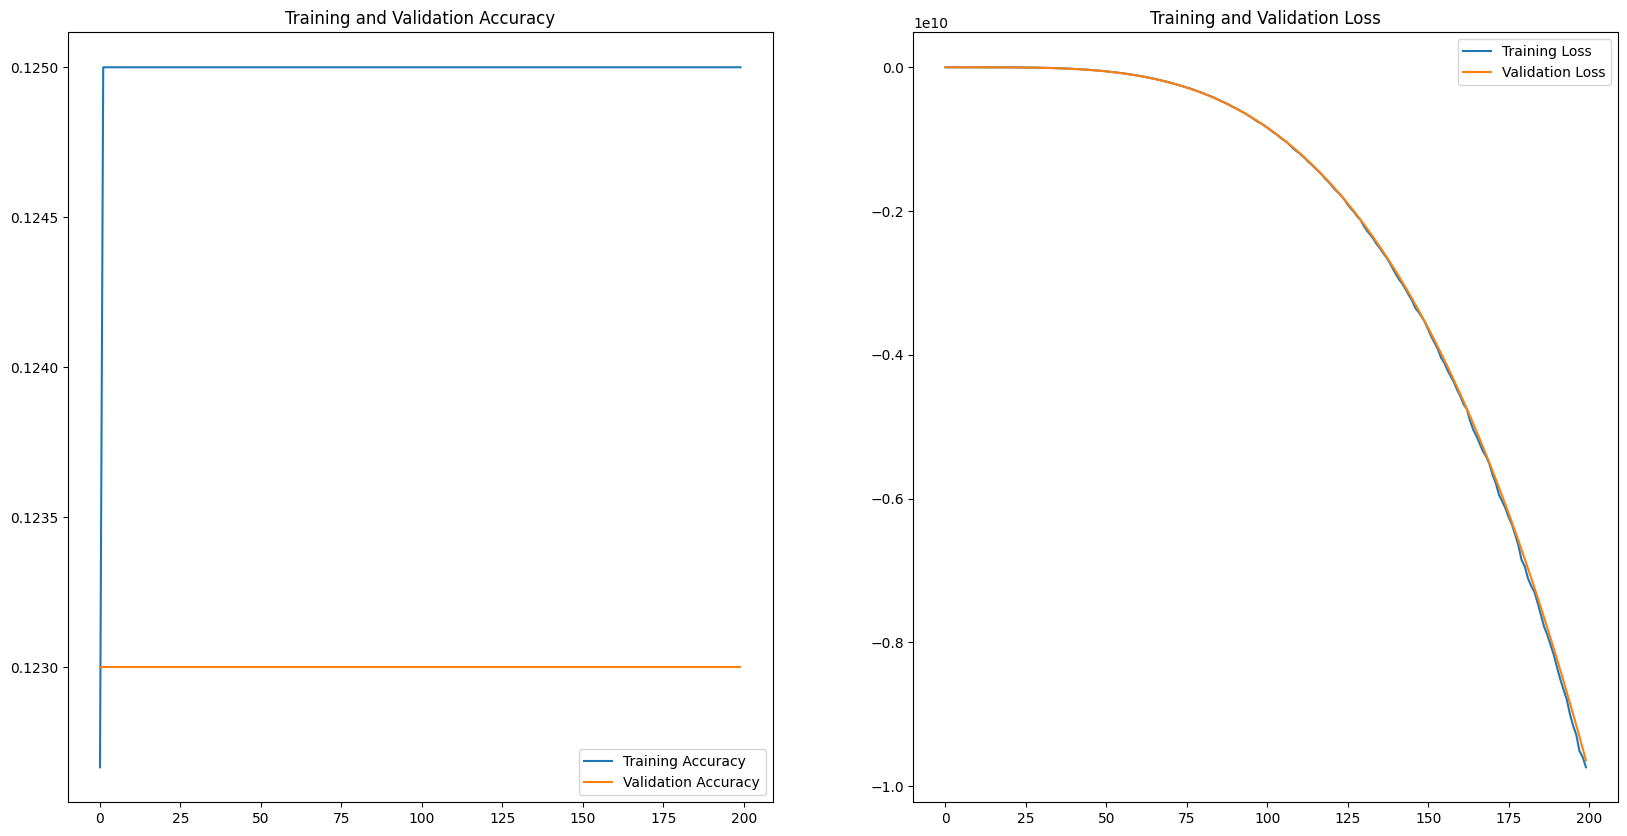

In [68]:
# Visualize accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200) #adjust epoch range if needed

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [284]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [286]:
#clear session
tf.keras.backend.clear_session()
# Model with data augmentation
history2 =model.fit(aug.flow(x_train, y_train, batch_size=BS),
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                callbacks=[checkpointer])

#additionally possible
# steps_per_epoch=len(x_train) // BS,
# validation_steps=len(x_val) // BS,

Epoch 1/200
12/12 [==============================] - ETA: 0s - loss: 0.8698 - accuracy: 0.6223
Epoch 1: val_loss did not improve from 0.71896
12/12 [==============================] - 10s 845ms/step - loss: 0.8698 - accuracy: 0.6223 - val_loss: 0.7215 - val_accuracy: 0.7260
Epoch 2/200
12/12 [==============================] - ETA: 0s - loss: 0.8488 - accuracy: 0.6507
Epoch 2: val_loss did not improve from 0.71896
12/12 [==============================] - 13s 1s/step - loss: 0.8488 - accuracy: 0.6507 - val_loss: 0.7508 - val_accuracy: 0.7150
Epoch 3/200
12/12 [==============================] - ETA: 0s - loss: 0.8465 - accuracy: 0.6363
Epoch 3: val_loss did not improve from 0.71896
12/12 [==============================] - 12s 1s/step - loss: 0.8465 - accuracy: 0.6363 - val_loss: 0.7439 - val_accuracy: 0.7070
Epoch 4/200
12/12 [==============================] - ETA: 0s - loss: 0.8463 - accuracy: 0.6417
Epoch 4: val_loss did not improve from 0.71896
12/12 [==============================] - 1

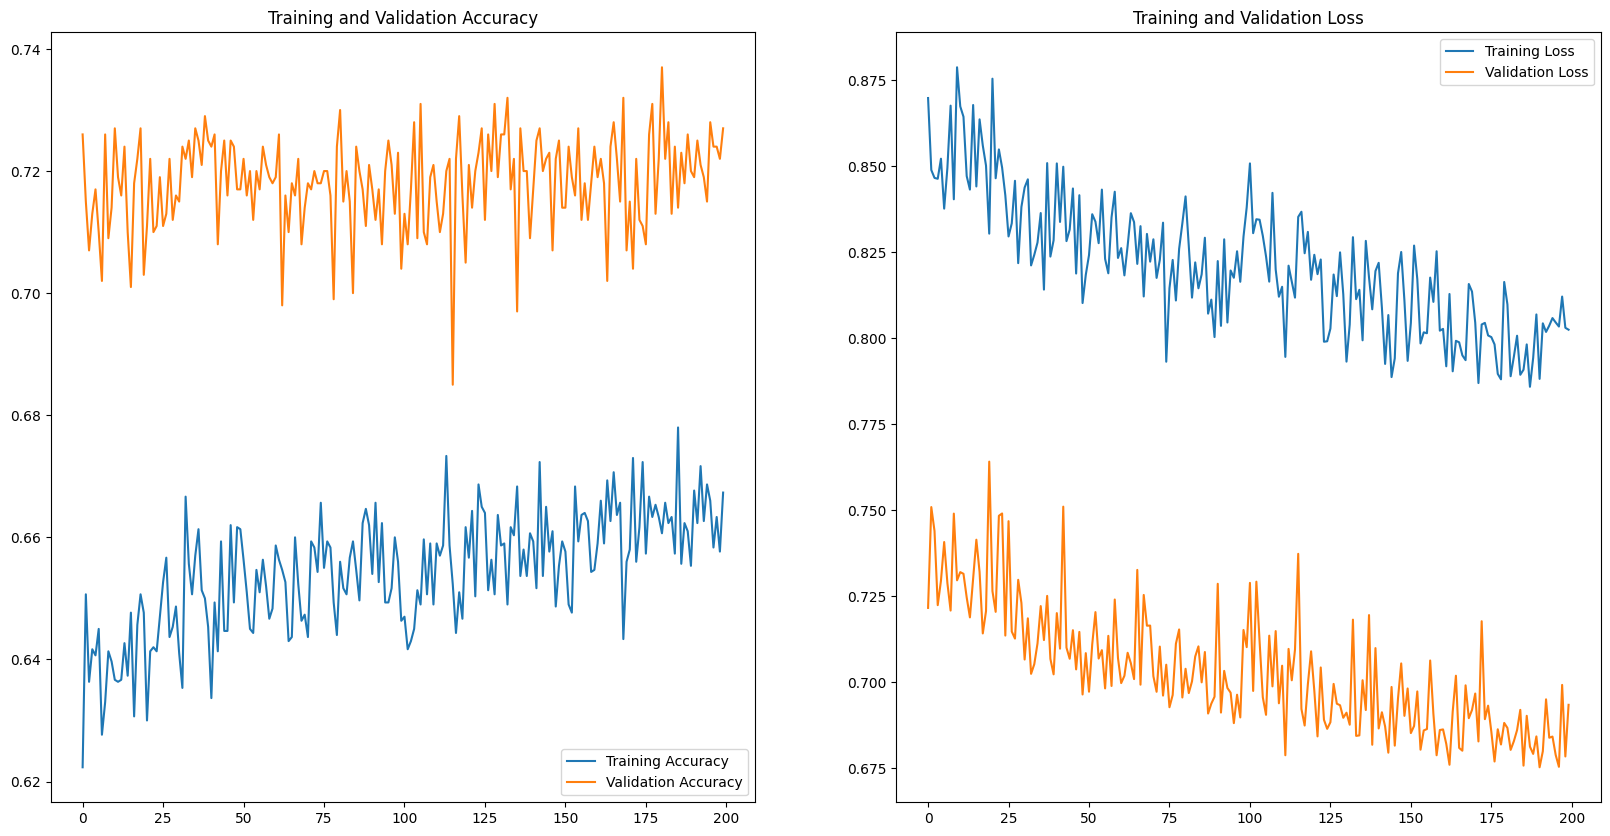

In [287]:
# Visualize accuracy
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(200) #adjust epoch range if needed

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [272]:
# opt = Adam(learning_rate=INIT_LR, weight_decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,
#     metrics=["accuracy"])
# H = model.fit(
#     aug.flow(x_train, y_train, batch_size=BS),
#     steps_per_epoch=len(x_train) // BS,
#     validation_data=(x_val, y_val),
#     validation_steps=len(x_val) // BS,
#     epochs=EPOCHS)

In [293]:
print("[INFO] evaluating network...")
predIdxs = model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(y_test, predIdxs,
    target_names=lb.classes_))
model.save("model_cancer_detection", save_format="h5")

# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

[INFO] evaluating network...
4/4 [==============================] - 0s 63ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [292]:
y_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)